In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
import seaborn as sns
from matplotlib import font_manager, rc, rcParams
from sklearn.model_selection import train_test_split
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False
%matplotlib notebook

## 범주형 변수

### 원 핫 인코딩

In [6]:
import os
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'adult.data'),header=None,index_col=False,names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

In [7]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]
data

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32557,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32558,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32559,22,Private,HS-grad,Male,20,Adm-clerical,<=50K


In [10]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [12]:
print('원본특성 :\n',list(data.columns),'\n')
data_dummies = pd.get_dummies(data)
print('get_dummies 후의 특성 :\n',list(data_dummies.columns))

원본특성 :
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성 :
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_

In [13]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ >50K'].values
print('X.shape: {} y.shape: {}'.format(X.shape,y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression().fit(X_train,y_train)
print('test score :{:.2f}'.format(logreg.score(X_test,y_test)))

test score :0.81


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 숫자로 표현된 범주형 특성

In [25]:
demo_df = pd.DataFrame({'num':[0,1,2,1],'cat':['양말','여우','양말','상자']})
demo_df

,num,cat
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [26]:
pd.get_dummies(demo_df)

,num,cat_상자,cat_양말,cat_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [29]:
demo_df.num = demo_df.num.astype(str)
pd.get_dummies(demo_df)

,num_0,num_1,num_2,cat_상자,cat_양말,cat_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## OneHotEncoder와 ColumnTransformer

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [32]:
print(ohe.get_feature_names()) # OneHotEncoder는 모든 컬럼을 범주로 인식한다.

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [33]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([('scaling',StandardScaler(),['age','hours-per-week'])
                       ,('onehot',OneHotEncoder(sparse=False),['workclass','education','gender','occupation'])])

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop('income',axis=1)

X_train,X_test,y_train,y_test = train_test_split(data_features,data.income,random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)

print(X_train_trans.shape)


(24420, 44)


In [38]:
logreg = LogisticRegression()
logreg.fit(X_train_trans,y_train)

X_test_trans = ct.transform(X_test)
print('테스트 점수 : {:.2f}'.format(logreg.score(X_test_trans,y_test)))

테스트 점수 : 0.81


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

### make_column_transformer로 간편하게 ColumnTransformer 만들기

In [40]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer((['age','hours-per-week'],StandardScaler())
                            ,(['workclass','education','gender','occupation'],OneHotEncoder(sparse=False)))

## 구간분할, 이산화 그리고 선형모델, 트리모델

<IPython.core.display.Javascript object>


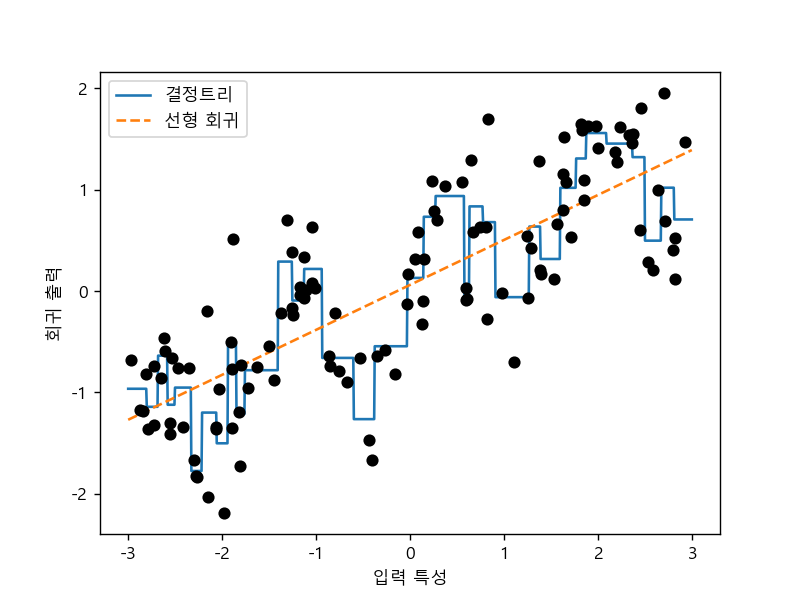

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line,reg.predict(line),label='결정트리')

reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),'--',label='선형 회귀')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [47]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform').fit(X)
print('bin edges :\n',kb.bin_edges_)

bin edges :
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [48]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [49]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [50]:
kb = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='onehot-dense').fit(X)
X_binned = kb.transform(X)

<IPython.core.display.Javascript object>


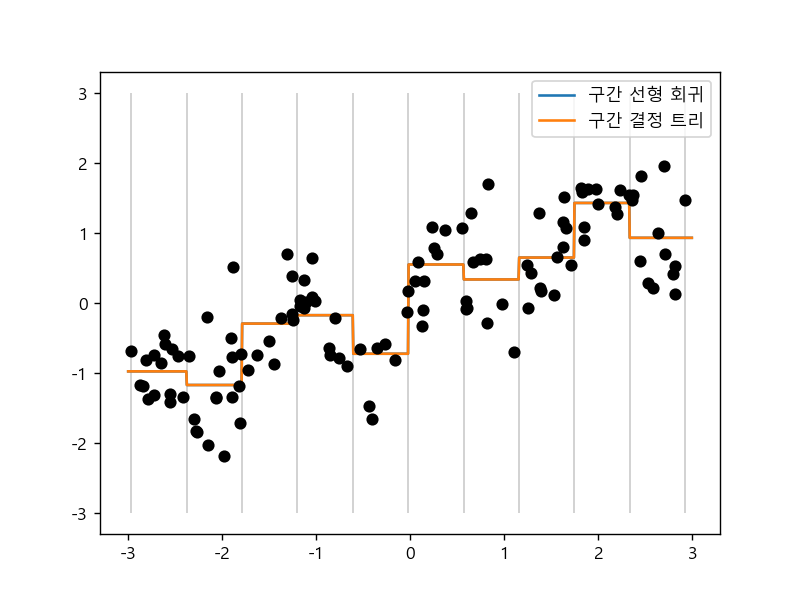

In [58]:
line_binned = kb.transform(line)

plt.figure()
reg = LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='구간 결정 트리')

plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')

### 상호작용과 다항식

In [60]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)

(120, 11)


<IPython.core.display.Javascript object>


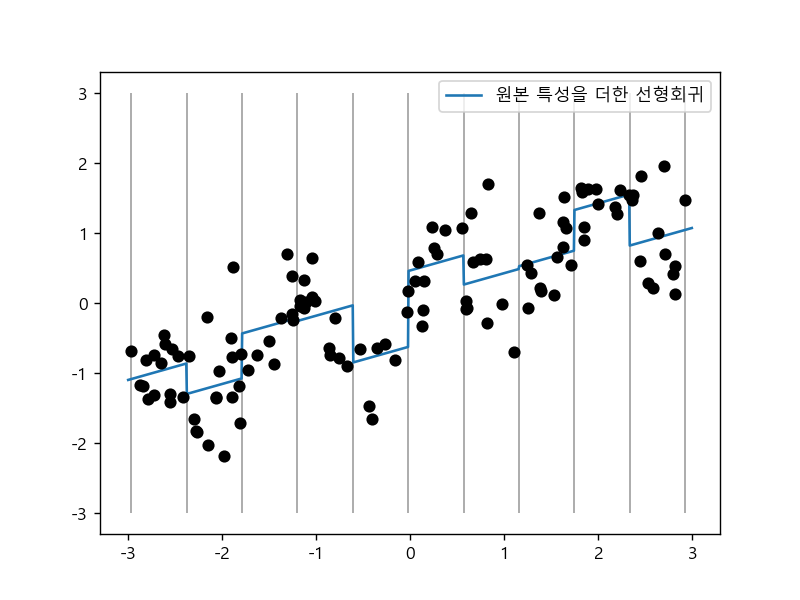

In [62]:
reg = LinearRegression().fit(X_combined,y)

line_combined = np.hstack([line,line_binned])
plt.figure()
plt.plot(line,reg.predict(line_combined),label='원본 특성을 더한 선형회귀')

plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')


<IPython.core.display.Javascript object>


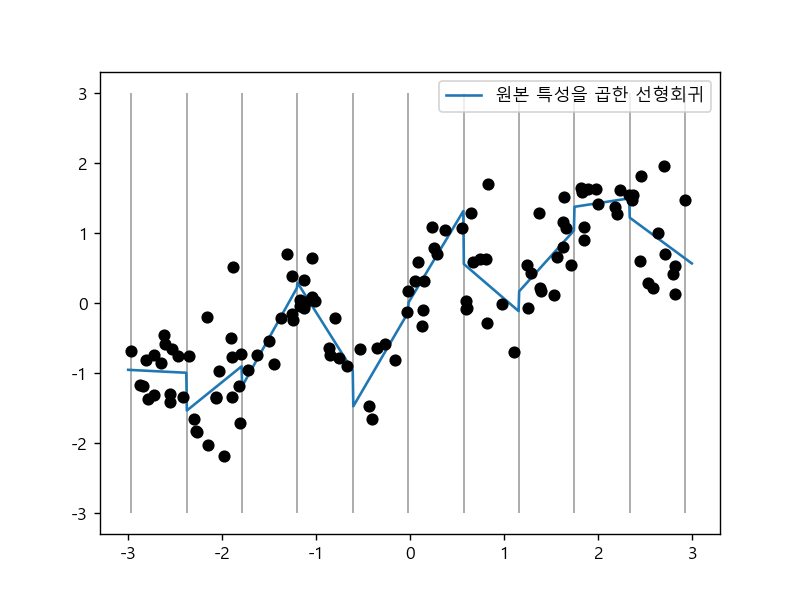

In [63]:
X_product = np.hstack([X_binned,X*X_binned])

reg = LinearRegression().fit(X_product,y)

line_product = np.hstack([line_binned,line*line_binned])
plt.figure()
plt.plot(line,reg.predict(line_product),label='원본 특성을 곱한 선형회귀')

plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')


In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10,include_bias=False).fit(X)
X_poly = poly.transform(X) 

print(f'X_poly.shape : {X_poly.shape}')

X_poly.shape : (120, 10)


In [69]:
print('X 원소 :\n',X[:5])
print('X_poly 원소 :\n',X_poly[:5])

X 원소 :
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소 :
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [70]:
print('항 이름 :\n',poly.get_feature_names())

항 이름 :
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


<IPython.core.display.Javascript object>


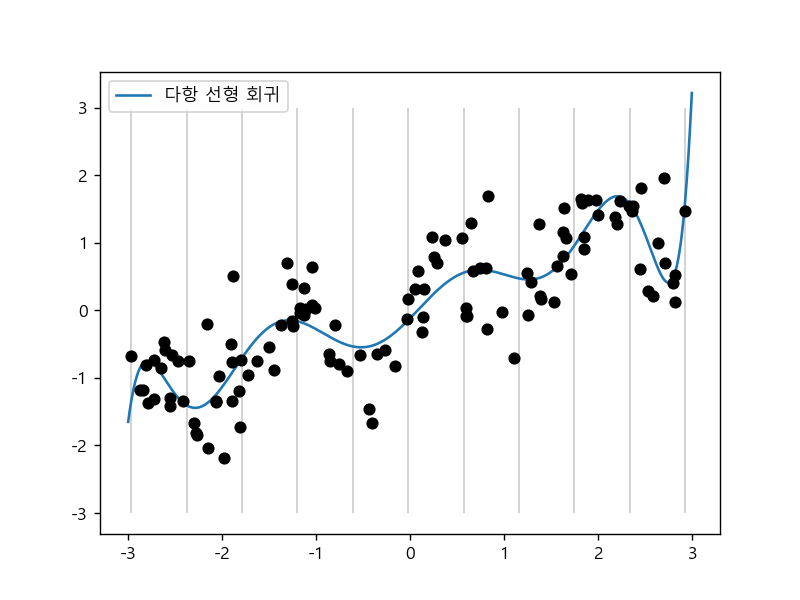

In [74]:
reg = LinearRegression().fit(X_poly,y)

line_poly = poly.transform(line)
plt.figure()
plt.plot(line,reg.predict(line_poly),label='다항 선형 회귀')


plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')



<IPython.core.display.Javascript object>


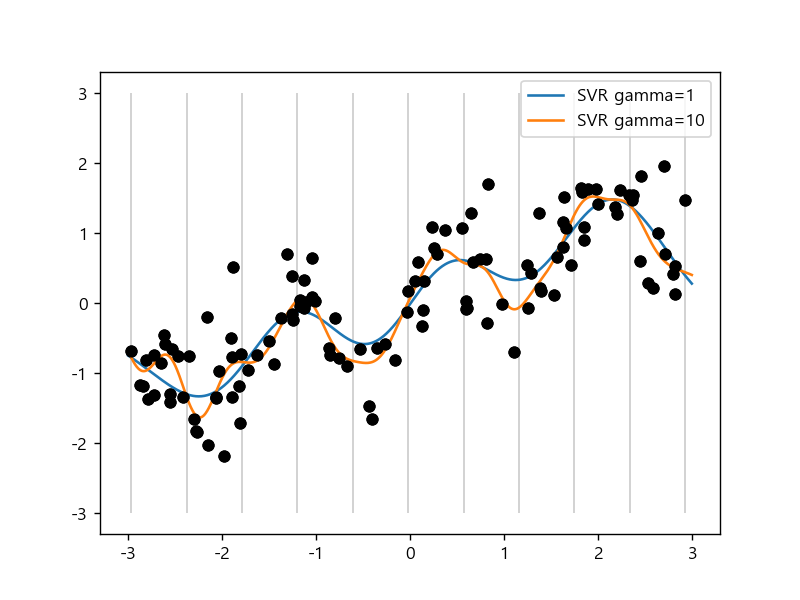

In [77]:
from sklearn.svm import SVR

plt.figure()
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line),label=f'SVR gamma={gamma}')

    plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')

In [80]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [82]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)
print('상호작용 특성이 없을 때 : {:.3f}'.format(ridge.score(X_test_scaled,y_test)))
ridge = Ridge().fit(X_train_poly,y_train)
print('상호작용 특성이 없을 때 : {:.3f}'.format(ridge.score(X_test_poly,y_test)))

상호작용 특성이 없을 때 : 0.621
상호작용 특성이 없을 때 : 0.753


In [85]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=0).fit(X_train_scaled,y_train)
print('상호작용 특성이 없을 때 : {:.3f}'.format(rf.score(X_test_scaled,y_test)))
rf = RandomForestRegressor(n_estimators=100,random_state=0).fit(X_train_poly,y_train)
print('상호작용 특성이 없을 때 : {:.3f}'.format(rf.score(X_test_poly,y_test)))

상호작용 특성이 없을 때 : 0.795
상호작용 특성이 없을 때 : 0.775


## 일변량 비선형 변환

In [89]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10,0])

[ 56  81  25  20  27  18  12  21 109   7]


In [90]:
print('특성 출현 횟수:\n',np.bincount(X[:,0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


<IPython.core.display.Javascript object>


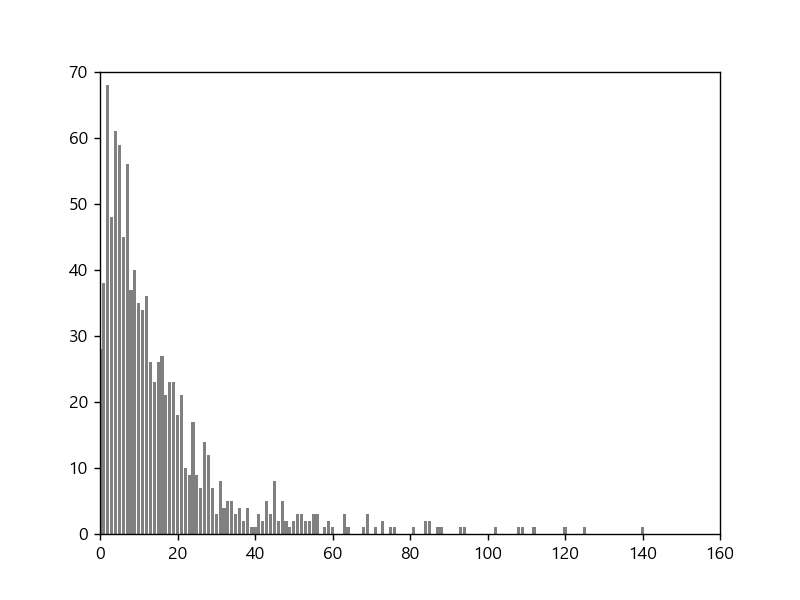

<BarContainer object of 141 artists>

In [92]:
plt.figure()
plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins,color='gray')


In [93]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print('테스트 점수 : {:.3f}'.format(score))

테스트 점수 : 0.622


<IPython.core.display.Javascript object>


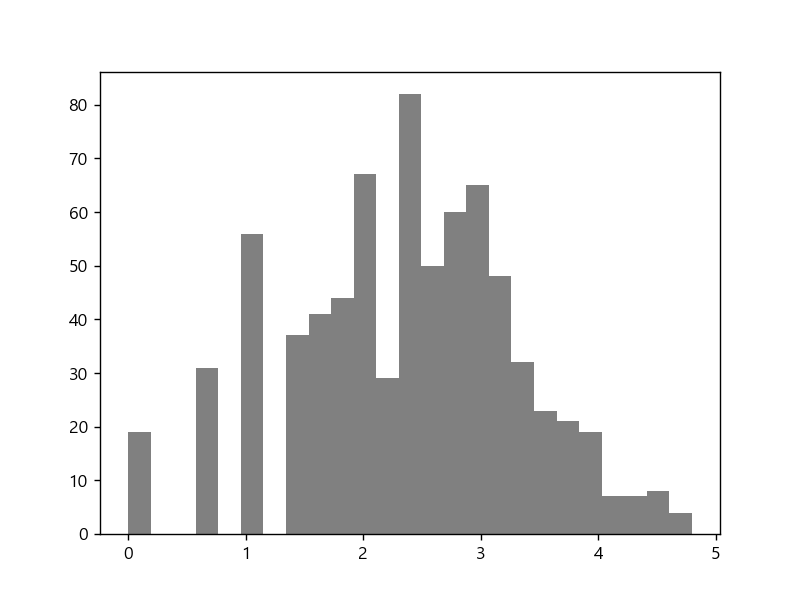

(array([19.,  0.,  0., 31.,  0., 56.,  0., 37., 41., 44., 67., 29., 82.,
        50., 60., 65., 48., 32., 23., 21., 19.,  7.,  7.,  8.,  4.]),
 array([0.        , 0.19183162, 0.38366324, 0.57549487, 0.76732649,
        0.95915811, 1.15098973, 1.34282135, 1.53465297, 1.7264846 ,
        1.91831622, 2.11014784, 2.30197946, 2.49381108, 2.68564271,
        2.87747433, 3.06930595, 3.26113757, 3.45296919, 3.64480081,
        3.83663244, 4.02846406, 4.22029568, 4.4121273 , 4.60395892,
        4.79579055]),
 <a list of 25 Patch objects>)

In [94]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.figure()
plt.hist(X_train_log[:,0],bins=25,color='gray')

In [95]:
score = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print('테스트 점수 : {:.3f}'.format(score))

테스트 점수 : 0.875


## 특성 자동 선택

### 일변량 통계

In [97]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50)) # 50개의 노이즈 특성 추가
X_w_noise = np.hstack([cancer.data,noise])

X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=.2)

select = SelectPercentile(score_func=f_classif,percentile=50)
select.fit(X_train,y_train)

X_train_selected = select.transform(X_train)

print('X_train.shape :',X_train.shape)
print('X_train_selected.shape :',X_train_selected.shape)

X_train.shape : (455, 80)
X_train_selected.shape : (455, 40)


In [98]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False  True False  True False  True
 False False False  True False False False  True False False False False
 False False False  True False False False False False False False False
  True False False False False False  True  True False False False  True
  True  True False  True False False False False]


In [100]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)

lr = LogisticRegression().fit(X_train,y_train)
print('전체 특성 사용 : {:.3f}'.format(lr.score(X_test,y_test)))
lr = LogisticRegression().fit(X_train_selected,y_train)
print('전체 특성 사용 : {:.3f}'.format(lr.score(X_test_selected,y_test)))

전체 특성 사용 : 0.886
전체 특성 사용 : 0.904


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

### 모델기반 특성 선택

In [101]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [102]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42)
                        ,threshold='median') # 절반정도만 추려내기

In [103]:
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print(f'X_train.shape : {X_train.shape}')
print(f'X_train_l1.shape : {X_train_l1.shape}')

X_train.shape : (455, 80)
X_train_l1.shape : (455, 40)


In [118]:
X_test_l1 = select.transform(X_test)
print(f'test set score : {LogisticRegression().fit(X_train_l1,y_train).score(X_test_l1,y_test)}')

test set score : 0.9298245614035088


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 반복적 특성 선택

In [120]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=40)
select.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

<IPython.core.display.Javascript object>


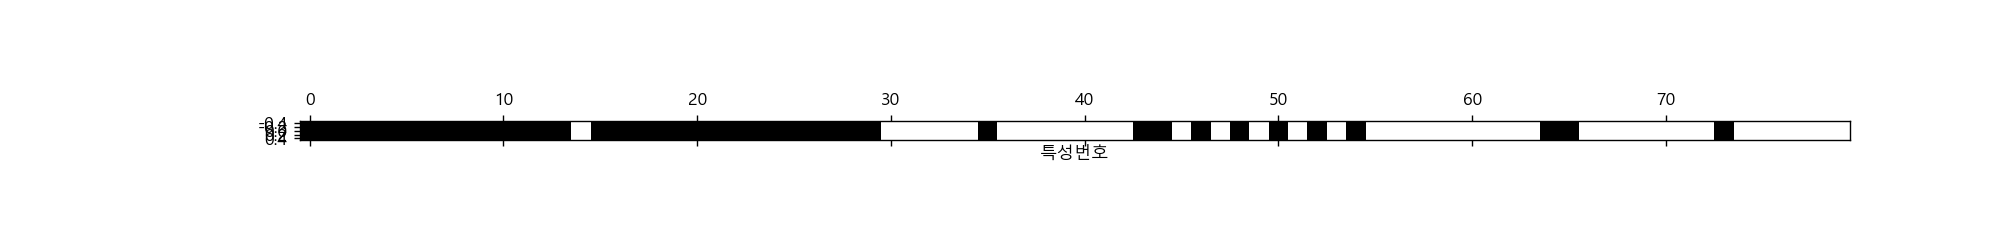

Text(0.5, 0, '특성번호')

In [122]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('특성번호')

## 전문가 지식 활용

In [124]:
citibike = mglearn.datasets.load_citibike()

citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

<IPython.core.display.Javascript object>


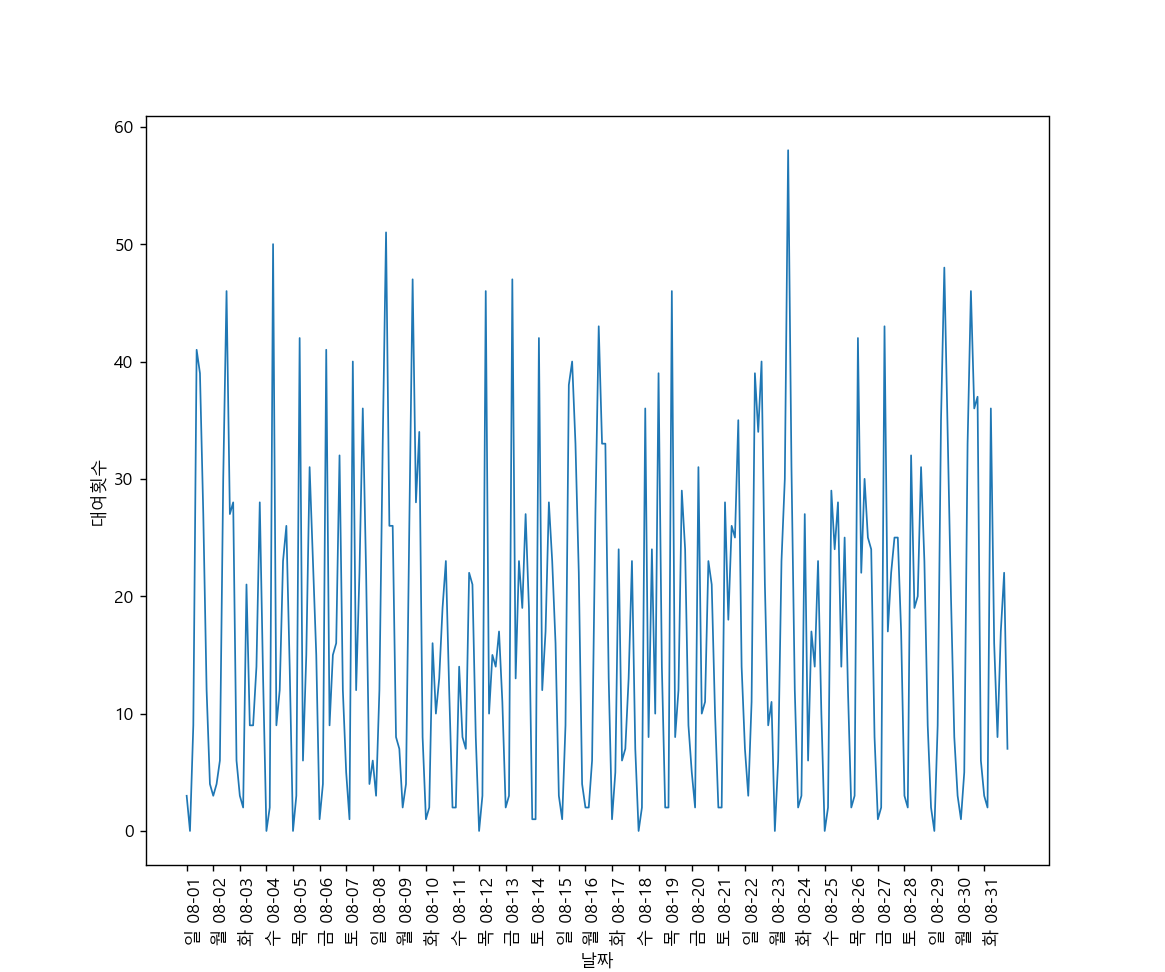

Text(0, 0.5, '대여횟수')

In [128]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(),end=citibike.index.max(),freq='D')
week = ['월','화','수','목','금','토','일']
xticks_name = [week[int(w)]+d for w,d in zip(xticks.strftime('%w'),xticks.strftime(' %m-%d'))]

plt.xticks(xticks, xticks_name,rotation=90,ha='left')
plt.plot(citibike,linewidth=1)
plt.xlabel('날짜')
plt.ylabel('대여횟수')

In [131]:
y = citibike.values
X = citibike.index.astype('int64').values.reshape(-1,1) // 10**9

In [132]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train,X_test = features[:n_train],features[n_train:]
    y_train,y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train,y_train)
    print('test set R^2 : {:.2f}'.format(regressor.score(X_test,y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0,len(X),8),xticks_name,rotation=90,ha='left')
    plt.plot(range(n_train),y_train,label='훈련')
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label='테스트')
    plt.plot(range(n_train),y_pred_train,'--',label='훈련 예측')
    plt.plot(range(n_train,len(y_test)+n_train),y_pred,'--',label='테스트 예측')
    
    plt.legend(loc=(1.01,0))
    plt.xlabel('날짜')
    plt.ylabel('대여횟수')

test set R^2 : -0.04


<IPython.core.display.Javascript object>


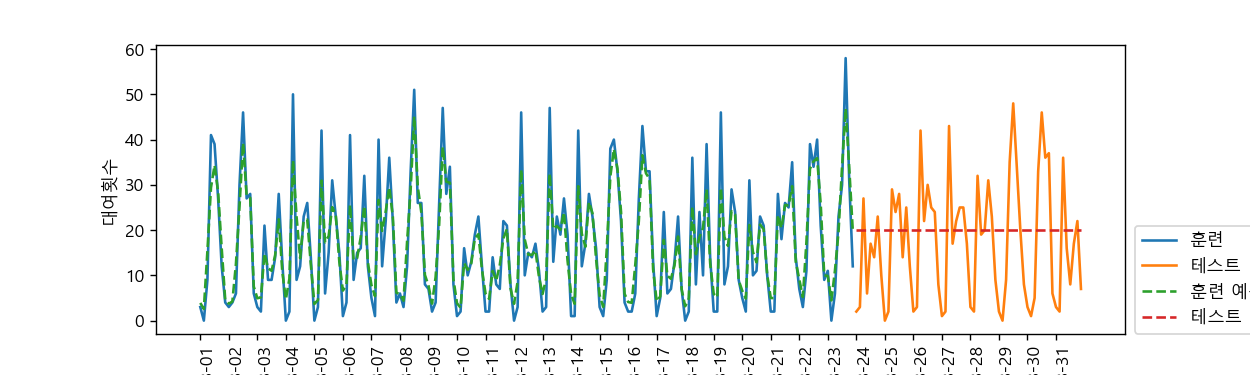

In [133]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
eval_on_features(X,y,regressor)

test set R^2 : 0.60


<IPython.core.display.Javascript object>


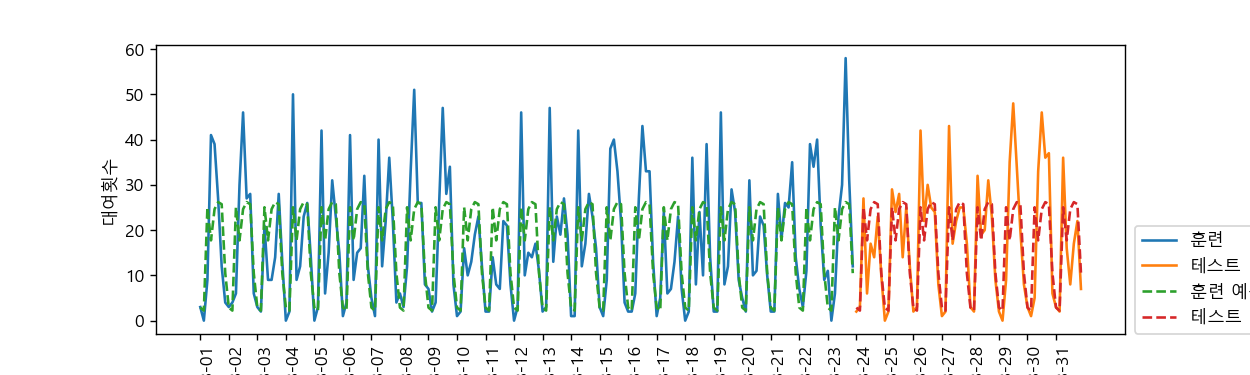

In [134]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour,y,regressor)

test set R^2 : 0.84


<IPython.core.display.Javascript object>


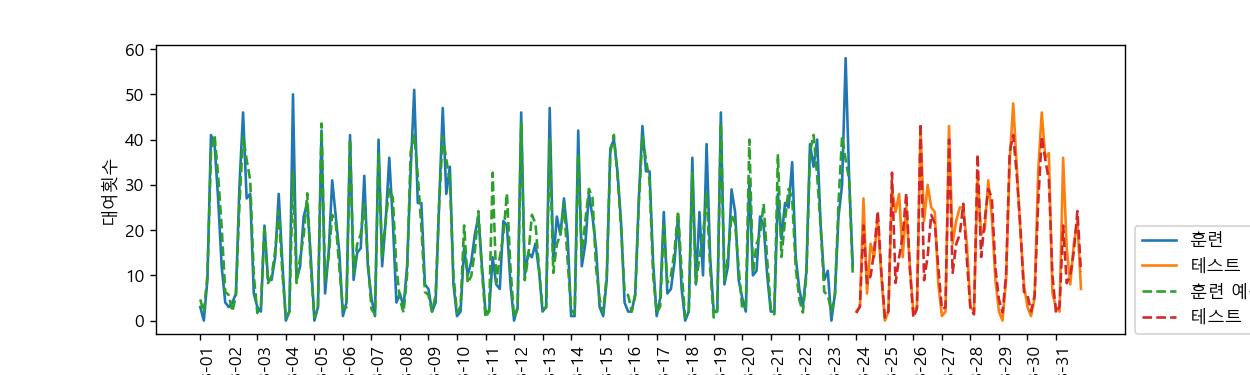

In [136]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1)
                        ,citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week,y,regressor)

test set R^2 : 0.13


<IPython.core.display.Javascript object>


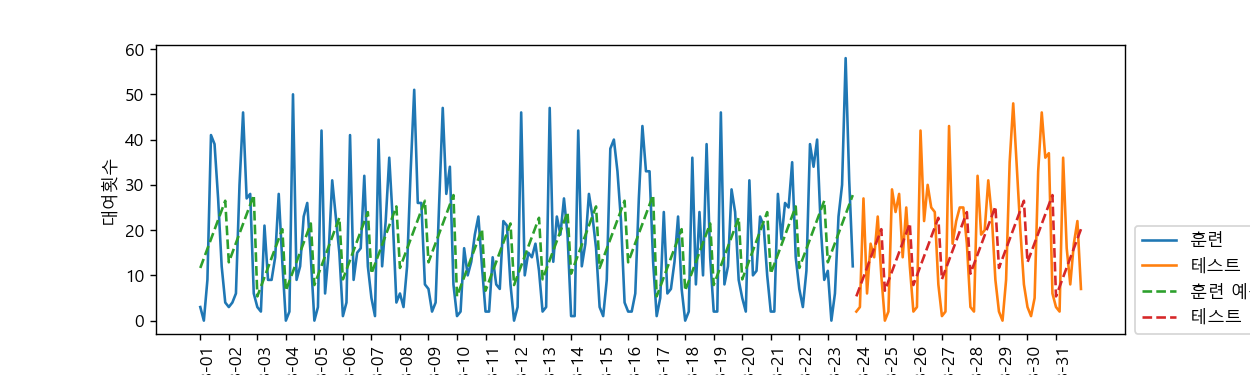

In [138]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week,y,regressor=LinearRegression())

test set R^2 : 0.62


<IPython.core.display.Javascript object>


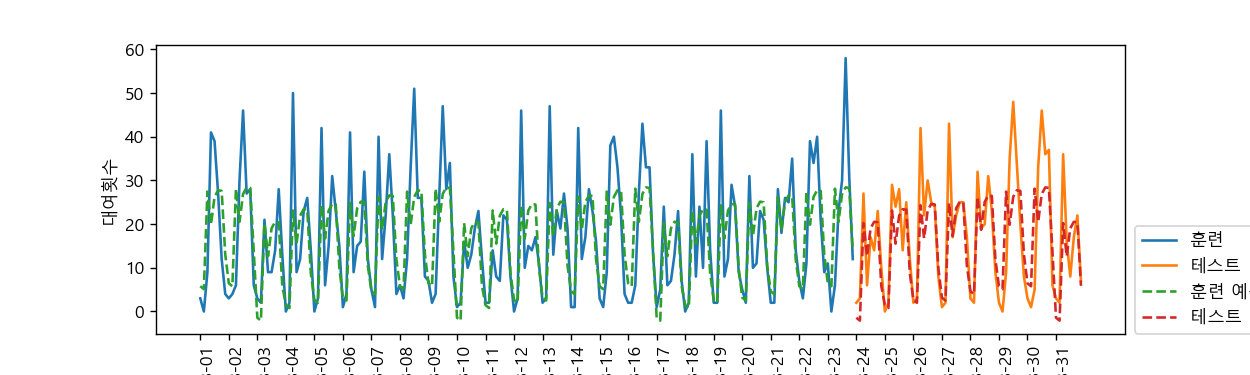

In [139]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot,y,Ridge())

test set R^2 : 0.85


<IPython.core.display.Javascript object>


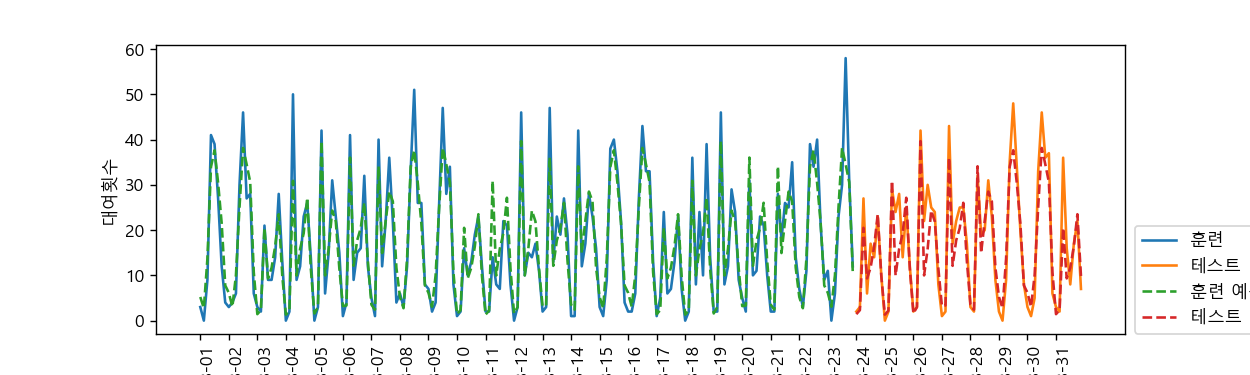

In [140]:
poly_transformer = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly,y,lr)

In [150]:
hour = ['%02d:00' % i for i in range(0,24,3)]
day = ['월','화','수','목','금','토','일']
features = day + hour
features

['월',
 '화',
 '수',
 '목',
 '금',
 '토',
 '일',
 '00:00',
 '03:00',
 '06:00',
 '09:00',
 '12:00',
 '15:00',
 '18:00',
 '21:00']

In [151]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

<IPython.core.display.Javascript object>


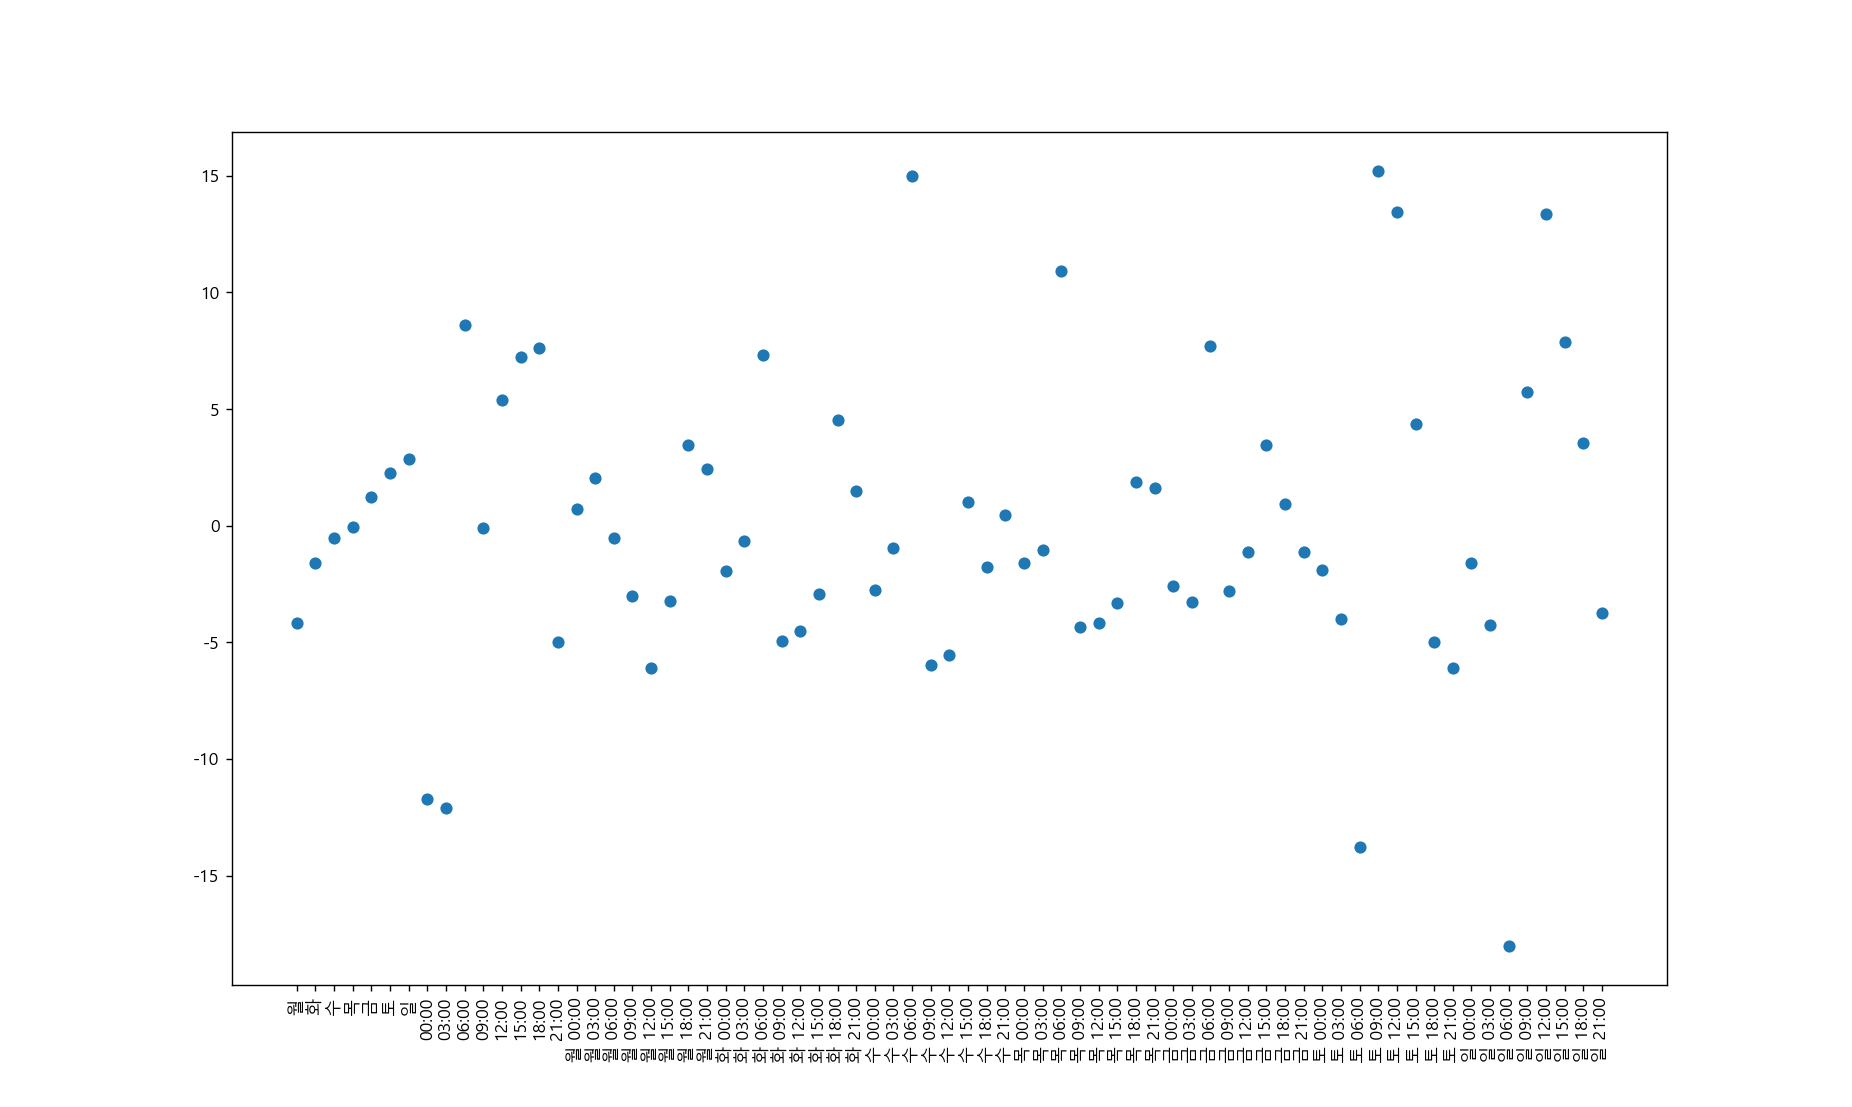

([<matplotlib.axis.XTick at 0x21de6005548>,
 [Text(0, 0, '월'),
  Text(0, 0, '화'),
  Text(0, 0, '수'),
  Text(0, 0, '목'),
  Text(0, 0, '금'),
  Text(0, 0, '토'),
  Text(0, 0, '일'),
  Text(0, 0, '00:00'),
  Text(0, 0, '03:00'),
  Text(0, 0, '06:00'),
  Text(0, 0, '09:00'),
  Text(0, 0, '12:00'),
  Text(0, 0, '15:00'),
  Text(0, 0, '18:00'),
  Text(0, 0, '21:00'),
  Text(0, 0, '월 00:00'),
  Text(0, 0, '월 03:00'),
  Text(0, 0, '월 06:00'),
  Text(0, 0, '월 09:00'),
  Text(0, 0, '월 12:00'),
  Text(0, 0, '월 15:00'),
  Text(0, 0, '월 18:00'),
  Text(0, 0, '월 21:00'),
  Text(0, 0, '화 00:00'),
  Text(0, 0, '화 03:00'),
  Text(0, 0, '화 06:00'),
  Text(0, 0, '화 09:00'),
  Text(0, 0, '화 12:00'),
  Text(0, 0, '화 15:00'),
  Text(0, 0, '화 18:00'),
  Text(0, 0, '화 21:00'),
  Text(0, 0, '수 00:00'),
  Text(0, 0, '수 03:00'),
  Text(0, 0, '수 06:00'),
  Text(0, 0, '수 09:00'),
  Text(0, 0, '수 12:00'),
  Text(0, 0, '수 15:00'),
  Text(0, 0, '수 18:00'),
  Text(0, 0, '수 21:00'),
  Text(0, 0, '목 00:00'),
  Text(0, 0, '

In [153]:
plt.figure(figsize=(15,4))
plt.plot(coef_nonzero,'o')
plt.xticks(np.arange(len(coef_nonzero)),features_nonzero,rotation=90)